In [8]:
import pandas as pd
import sklearn
import numpy as np
# from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import copy
import time
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz

## Load train test from csv

In [86]:
train = pd.read_csv(r'weather_data/df_full_train.csv')
test = pd.read_csv(r'weather_data/df_full_test.csv')

In [15]:
REL_FEATURES = [' _conds', ' _dewptm', ' _fog', ' _hail', ' _hum', ' _pressurem', ' _rain', ' _snow',
                ' _thunder', ' _tornado', ' _vism', ' _wspdm', 'year', 'hour_cos', 'hour_sin', 'month_cos',
                'month_sin', 'week_cos', 'week_sin', 'night', 'morning', 'noon', 'evening']
LABEL = ['Temp']

In [88]:
X_train = train[REL_FEATURES]
y_train = train[LABEL]

In [89]:
X_test = test[REL_FEATURES]
y_test = test[LABEL]

In [90]:
df = pd.get_dummies(pd.concat([X_train, X_test], ignore_index=True)).fillna(0)

In [91]:
X_train = df.loc[X_train.index]
X_test = df.loc[X_test.index]

# Random Forest full data

In [92]:
clf = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=2)
clf.fit(X_train, y_train)

C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

## Random forest full train pred

In [53]:
# pred on train
y_pred_train = clf.predict(X_train)

In [54]:
# accuracy on train
clf.score(X_train, y_train)

0.2950866433716038

In [55]:
mean_absolute_error(y_train, y_pred_train)

1.1049704057619625

In [56]:
mean_squared_error(y_train, y_pred_train)

2.1645154389217716

## Random forest full test pred

In [57]:
# pred on test
y_pred_test = clf.predict(X_test)

In [58]:
# accuracy on test
clf.score(X_test, y_test)

0.11666666666666667

In [59]:
mean_squared_error(y_test, y_pred_test)

11.74375

# Random Forest day parts data

In [70]:
for part in ['night', 'morning', 'noon', 'evening']:
    print(fr'{part} data')
    
    ## Load train test from csv

    train_part = pd.read_csv(fr'weather_data/df_{part}_train.csv')
    test_part = pd.read_csv(fr'weather_data/df_{part}_test.csv')

    X_train_part = train_part[REL_FEATURES]
    y_train_part = train_part[LABEL]

    X_test_part = test_part[REL_FEATURES]
    y_test_part = test_part[LABEL]

    df = pd.get_dummies(pd.concat([X_train_part, X_test_part], ignore_index=True)).fillna(0)

    X_train_part = df.loc[X_train_part.index]
    X_test_part = df.loc[X_test_part.index]

    clf = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=2)
    clf.fit(X_train_part, y_train_part)

    ## Random forest train pred

    # pred on train
    y_pred_train_part = clf.predict(X_train_part)

    # accuracy on train
    print(clf.score(X_train_part, y_train_part))

    print(mean_squared_error(y_train_part, y_pred_train_part))

    ## Random forest test pred

    # pred on test
    y_pred_test_part = clf.predict(X_test_part)

    # accuracy on test
    print(clf.score(X_test_part, y_test_part))

    print(mean_squared_error(y_test_part, y_pred_test_part))

night data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.43664772727272727
1.2167613636363637
0.15342465753424658
16.56986301369863
morning data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.4560752994865944
1.4386765544780376
0.0881542699724518
8.96418732782369
noon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.33513821601595895
1.5531490453120547
0.08913649025069638
9.682451253481894
evening data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.37155963302752293
1.3176605504587156
0.16147308781869688
12.070821529745043


# Random Forest months data

In [74]:
for m in range(1, 13):
    print(fr'month {m} data')
    
    ## Load train test from csv

    train_part = pd.read_csv(fr'weather_data/df_month_{m}_train.csv')
    test_part = pd.read_csv(fr'weather_data/df_month_{m}_test.csv')

    X_train_part = train_part[REL_FEATURES]
    y_train_part = train_part[LABEL]

    X_test_part = test_part[REL_FEATURES]
    y_test_part = test_part[LABEL]

    df = pd.get_dummies(pd.concat([X_train_part, X_test_part], ignore_index=True)).fillna(0)

    X_train_part = df.loc[X_train_part.index]
    X_test_part = df.loc[X_test_part.index]

    clf = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=2)
    clf.fit(X_train_part, y_train_part)

    ## Random forest train pred

    # pred on train
    y_pred_train_part = clf.predict(X_train_part)

    # accuracy on train
    print(clf.score(X_train_part, y_train_part))

    print(mean_squared_error(y_train_part, y_pred_train_part))

    ## Random forest test pred

    # pred on test
    y_pred_test_part = clf.predict(X_test_part)

    # accuracy on test
    print(clf.score(X_test_part, y_test_part))

    print(mean_squared_error(y_test_part, y_pred_test_part))

month 1 data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.47483766233766234
0.9943181818181818
0.3629032258064516
1.596774193548387
month 2 data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.38447488584474887
1.1433789954337898
0.2857142857142857
3.9642857142857144
month 3 data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.35978358881875566
1.3985572587917043
0.25
5.362903225806452
month 4 data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.44609665427509293
1.095724907063197
0.15254237288135594
6.203389830508475
month 5 data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.4685251798561151
1.29136690647482
0.31092436974789917
3.7815126050420167
month 6 data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.590633130962706
0.6513443191673894
0.3
2.941666666666667
month 7 data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5380875202593193
0.6150729335494327
0.2727272727272727
1.5950413223140496
month 8 data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6504770164787511
0.37294015611448394
0.3220338983050847
1.347457627118644
month 9 data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5507976490344249
0.5583543240973972
0.3445378151260504
1.2521008403361344
month 10 data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.4560975609756098
0.8
0.32786885245901637
3.918032786885246
month 11 data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.38083333333333336
1.0783333333333334
0.39166666666666666
1.2083333333333333
month 12 data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.4168012924071082
0.9297253634894992
0.23577235772357724
4.154471544715447


# Random Forest seasons data

In [98]:
for s in ['winter', 'spring', 'summer', 'monsoon', 'autumn']:
    print(fr'season {s} data')
    
    ## Load train test from csv

    train_part = pd.read_csv(fr'weather_data/df_season_{s}_train.csv')
    test_part = pd.read_csv(fr'weather_data/df_season_{s}_test.csv')

    X_train_part = train_part[REL_FEATURES]
    y_train_part = train_part[LABEL]

    X_test_part = test_part[REL_FEATURES]
    y_test_part = test_part[LABEL]

    df = pd.get_dummies(pd.concat([X_train_part, X_test_part], ignore_index=True)).fillna(0)

    X_train_part = df.loc[X_train_part.index]
    X_test_part = df.loc[X_test_part.index]

    clf = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=2)
    clf.fit(X_train_part, y_train_part)

    ## Random forest train pred

    # pred on train
    y_pred_train_part = clf.predict(X_train_part)

    # accuracy on train
    print(clf.score(X_train_part, y_train_part))

    print(mean_squared_error(y_train_part, y_pred_train_part))

    ## Random forest test pred

    # pred on test
    y_pred_test_part = clf.predict(X_test_part)

    # accuracy on test
    print(clf.score(X_test_part, y_test_part))

    print(mean_squared_error(y_test_part, y_pred_test_part))

season winter data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.49190283400809715
0.917004048582996
0.3076923076923077
3.3927125506072873
season spring data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.3561705989110708
1.5040834845735027
0.2457627118644068
6.970338983050848
season summer data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.40915893445076323
1.5483388207123616
0.3557422969187675
2.719887955182073
season monsoon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5781879194630872
0.5359060402684563
0.3210702341137124
1.5250836120401339
season autumn data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.40785997357992076
0.9815059445178336
0.27906976744186046
3.159468438538206


# Random Forest months + day part data

In [106]:
for m in range(1, 13):
    for p in ['night', 'morning', 'noon', 'evening']:
        print(fr'month {m} day part {p} data')

        ## Load train test from csv
        train_part = pd.read_csv(fr'weather_data/df_month_{m}_train.csv')
        test_part = pd.read_csv(fr'weather_data/df_month_{m}_test.csv')
        
        train_part = train_part[train_part[p] == 1].reset_index()
        test_part = test_part[test_part[p] == 1].reset_index()

        X_train_part = train_part[REL_FEATURES]
        y_train_part = train_part[LABEL]

        X_test_part = test_part[REL_FEATURES]
        y_test_part = test_part[LABEL]

        df = pd.get_dummies(pd.concat([X_train_part, X_test_part], ignore_index=True)).fillna(0)

        X_train_part = df.loc[X_train_part.index]
        X_test_part = df.loc[X_test_part.index]

        clf = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=2)
        clf.fit(X_train_part, y_train_part)

        ## Random forest train pred

        # pred on train
        y_pred_train_part = clf.predict(X_train_part)

        # accuracy on train
        print(clf.score(X_train_part, y_train_part))

        print(mean_squared_error(y_train_part, y_pred_train_part))

        ## Random forest test pred

        # pred on test
        y_pred_test_part = clf.predict(X_test_part)

        # accuracy on test
        print(clf.score(X_test_part, y_test_part))

        print(mean_squared_error(y_test_part, y_pred_test_part))

month 1 day part night data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6148867313915858
0.8090614886731392
0.5161290322580645
0.6774193548387096
month 1 day part morning data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.4642857142857143
0.8766233766233766
0.12903225806451613
2.774193548387097
month 1 day part noon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5439739413680782
0.6840390879478827
0.25806451612903225
2.161290322580645
month 1 day part evening data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6623376623376623
0.4448051948051948
0.5806451612903226
0.6129032258064516
month 2 day part night data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5543478260869565
0.7536231884057971
0.42857142857142855
1.7857142857142858
month 2 day part morning data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.48717948717948717
0.9853479853479854
0.2857142857142857
3.0
month 2 day part noon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.47619047619047616
0.7875457875457875
0.2857142857142857
1.8571428571428572
month 2 day part evening data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5421245421245421
0.6556776556776557
0.42857142857142855
1.4285714285714286
month 3 day part night data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5519713261648745
0.7741935483870968
0.3225806451612903
1.1612903225806452
month 3 day part morning data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.4659498207885305
1.093189964157706
0.3225806451612903
0.967741935483871
month 3 day part noon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.45126353790613716
1.0902527075812274
0.3870967741935484
1.5161290322580645
month 3 day part evening data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5255474452554745
0.6788321167883211
0.45161290322580644
0.8387096774193549
month 4 day part night data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5481481481481482
0.7185185185185186
0.3
2.1666666666666665
month 4 day part morning data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5185185185185185
1.3148148148148149
0.5517241379310345
1.3793103448275863
month 4 day part noon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5259259259259259
1.162962962962963
0.3103448275862069
1.3103448275862069
month 4 day part evening data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.4849624060150376
0.8909774436090225
0.26666666666666666
1.6
month 5 day part night data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5071942446043165
0.6546762589928058
0.5483870967741935
0.9354838709677419
month 5 day part morning data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6402877697841727
1.370503597122302
0.8709677419354839
0.12903225806451613
month 5 day part noon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5627240143369175
1.4516129032258065
0.5666666666666667
1.0
month 5 day part evening data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5054151624548736
0.8050541516245487
0.3333333333333333
1.3333333333333333
month 6 day part night data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.563573883161512
0.5910652920962199
0.36666666666666664
1.4666666666666666
month 6 day part morning data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6236933797909407
0.9512195121951219
0.6333333333333333
0.9666666666666667
month 6 day part noon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5958188153310104
0.759581881533101
0.36666666666666664
2.033333333333333
month 6 day part evening data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5520833333333334
0.6840277777777778
0.3
1.3666666666666667
month 7 day part night data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6741935483870968
0.33548387096774196
0.4838709677419355
0.5161290322580645
month 7 day part morning data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6310679611650486
0.5275080906148867
0.5
1.2333333333333334
month 7 day part noon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5612903225806452
0.5258064516129032
0.36666666666666664
1.4
month 7 day part evening data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6131147540983607
0.46557377049180326
0.4
1.0
month 8 day part night data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.740484429065744
0.2698961937716263
0.4838709677419355
0.5161290322580645
month 8 day part morning data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6816608996539792
0.4429065743944637
0.45161290322580644
1.1290322580645162
month 8 day part noon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6241379310344828
0.4379310344827586
0.42857142857142855
0.8928571428571429
month 8 day part evening data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.631578947368421
0.37894736842105264
0.5714285714285714
0.42857142857142855
month 9 day part night data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6588628762541806
0.41471571906354515
0.6
0.4
month 9 day part morning data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6148648648648649
0.5878378378378378
0.43333333333333335
1.3666666666666667
month 9 day part noon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.587248322147651
0.5033557046979866
0.23333333333333334
1.7333333333333334
month 9 day part evening data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7248322147651006
0.31543624161073824
0.2413793103448276
0.8620689655172413
month 10 day part night data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5857605177993528
0.6019417475728155
0.2903225806451613
0.7096774193548387
month 10 day part morning data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5895765472312704
0.46905537459283386
0.5161290322580645
0.4838709677419355
month 10 day part noon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5811688311688312
0.525974025974026
0.41935483870967744
1.7419354838709677
month 10 day part evening data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6568627450980392
0.43137254901960786
0.4482758620689655
0.8620689655172413
month 11 day part night data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5833333333333334
0.5666666666666667
0.7
0.8
month 11 day part morning data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5733333333333334
0.5166666666666667
0.5333333333333333
0.9333333333333333
month 11 day part noon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5133333333333333
0.8
0.3
1.4
month 11 day part evening data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.63
0.45
0.7333333333333333
0.36666666666666664
month 12 day part night data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5516129032258065
0.7419354838709677
0.4838709677419355
0.6129032258064516
month 12 day part morning data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5580645161290323
0.7774193548387097
0.45161290322580644
1.032258064516129
month 12 day part noon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.4967741935483871
0.7903225806451613
0.45161290322580644
2.193548387096774
month 12 day part evening data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5616883116883117
0.5064935064935064
0.36666666666666664
0.7333333333333333


# Random Forest seasons + day part data

In [107]:
for s in ['winter', 'spring', 'summer', 'monsoon', 'autumn']:
    for p in ['night', 'morning', 'noon', 'evening']:
        print(fr'season {s} day part {p} data')

        ## Load train test from csv

        train_part = pd.read_csv(fr'weather_data/df_season_{s}_train.csv')
        test_part = pd.read_csv(fr'weather_data/df_season_{s}_test.csv')
        
        train_part = train_part[train_part[p] == 1].reset_index()
        test_part = test_part[test_part[p] == 1].reset_index()

        X_train_part = train_part[REL_FEATURES]
        y_train_part = train_part[LABEL]

        X_test_part = test_part[REL_FEATURES]
        y_test_part = test_part[LABEL]

        df = pd.get_dummies(pd.concat([X_train_part, X_test_part], ignore_index=True)).fillna(0)

        X_train_part = df.loc[X_train_part.index]
        X_test_part = df.loc[X_test_part.index]

        clf = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=2)
        clf.fit(X_train_part, y_train_part)

        ## Random forest train pred

        # pred on train
        y_pred_train_part = clf.predict(X_train_part)

        # accuracy on train
        print(clf.score(X_train_part, y_train_part))

        print(mean_squared_error(y_train_part, y_pred_train_part))

        ## Random forest test pred

        # pred on test
        y_pred_test_part = clf.predict(X_test_part)

        # accuracy on test
        print(clf.score(X_test_part, y_test_part))

        print(mean_squared_error(y_test_part, y_pred_test_part))

season winter day part night data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.617124394184168
0.7334410339256866
0.5161290322580645
0.6774193548387096
season winter day part morning data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.4449838187702265
1.0339805825242718
0.3064516129032258
2.274193548387097
season winter day part noon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5121555915721232
0.713128038897893
0.3870967741935484
1.7580645161290323
season winter day part evening data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5292207792207793
0.5811688311688312
0.47540983606557374
0.6229508196721312
season spring day part night data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.4666666666666667
0.9837837837837838
0.2542372881355932
3.0847457627118646
season spring day part morning data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.4003623188405797
1.3315217391304348
0.1694915254237288
2.9152542372881354
season spring day part noon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.4309090909090909
1.2381818181818183
0.2542372881355932
3.23728813559322
season spring day part evening data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.4625228519195612
0.9177330895795247
0.2033898305084746
3.0
season summer day part night data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.45530393325387364
0.9892729439809297
0.27472527472527475
1.7252747252747254
season summer day part morning data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5473053892215569
1.4934131736526945
0.7888888888888889
0.4111111111111111
season summer day part noon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.4820574162679426
1.388755980861244
0.4044943820224719
1.4606741573033708
season summer day part evening data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.4620938628158845
0.8796630565583634
0.28735632183908044
1.4482758620689655
season monsoon day part night data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6537433155080213
0.3622994652406417
0.44155844155844154
0.5584415584415584
season monsoon day part morning data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6327077747989276
0.46648793565683644
0.39473684210526316
1.25
season monsoon day part noon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.4839572192513369
0.7219251336898396
0.3287671232876712
1.273972602739726
season monsoon day part evening data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5338753387533876
0.6531165311653117
0.4520547945205479
0.6301369863013698
season autumn day part night data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5019762845849802
0.7957839262187089
0.5
0.6842105263157895
season autumn day part morning data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5231788079470199
0.6291390728476821
0.618421052631579
0.7894736842105263
season autumn day part noon data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.39841688654353563
1.0303430079155673
0.34210526315789475
1.144736842105263
season autumn day part evening data


C:\Users\Fedia\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5396825396825397
0.5317460317460317
0.5753424657534246
0.589041095890411


In [25]:
LABEL

['Temp']

In [36]:
def rundom_forest(model_name, results):
    results[model_name] = {}
    if 'full' in str(model_name):
        print('full_year')
        shift = 2
        results[model_name]['freq'] = 'full_year'
    elif any(season in str(model_name) for season in ['winter', 'spring', 'summer', 'monsoon', 'autumn']):
#         print('season')
        if any(season in str(model_name) for season in ['winter', 'autumn']):
            shift = 0
        else:
            shift = 2
        results[model_name]['freq'] = 'season'
    elif any(str(month) in str(model_name) for month in range(1,13)):
#         print('month')
        shift = 0
        results[model_name]['freq'] = 'month'
    else:
        raise 'error'
        
    if 'all' in str(model_name):
#         print('all_day')
        results[model_name]['day_part'] = 'all_day'
    elif any(season in str(model_name) for season in ['night', 'morning', 'noon', 'evening']):
#         print('day_part')
        results[model_name]['day_part'] = 'one_part'
    else:
        raise 'error'


    ## Load train test from csv
    train_part = pd.read_csv(fr'../weather_data/df_{model_name}_train.csv')
    test_part = pd.read_csv(fr'../weather_data/df_{model_name}_test.csv')

    X_train_part = train_part[REL_FEATURES]
    y_train_part = train_part[LABEL]

    X_test_part = test_part[REL_FEATURES]
    y_test_part = test_part[LABEL[0]]

    df = pd.get_dummies(pd.concat([X_train_part, X_test_part], ignore_index=True)).fillna(0)

    X_train_part = df.loc[X_train_part.index]
    X_test_part = df.loc[X_test_part.index]

    clf = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=2)
    clf.fit(X_train_part, y_train_part)

    ## Random forest train pred

    # pred on train
    y_pred_train_part = clf.predict(X_train_part)

    # accuracy on train
    results[model_name]['train_acc'] = clf.score(X_train_part, y_train_part)

    results[model_name]['train_mse'] = mean_squared_error(y_train_part, y_pred_train_part)

    ## Random forest test pred

    # pred on test
    y_pred_test_part = clf.predict(X_test_part)

    # accuracy on test
    results[model_name]['test_acc'] = clf.score(X_test_part, y_test_part)

    results[model_name]['test_mse'] = mean_squared_error(y_test_part, y_pred_test_part)

    print(results[model_name])
    return results

In [37]:
results = {}
for freq_range in [[str(i) for i in range(1, 13)],  # month
                   ['autumn', 'winter', 'spring', 'monsoon', 'summer'],  # season
                   ['full']]:  # full year
    for freq_part in freq_range:
        for day_part in ['all', 'night', 'morning', 'noon', 'evening']:
            print('\n')
            print('_'.join([freq_part, day_part]))
            rundom_forest('_'.join([freq_part, day_part]), results)




1_all


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'all_day', 'train_acc': 0.47483766233766234, 'train_mse': 0.9943181818181818, 'test_acc': 0.3629032258064516, 'test_mse': 1.596774193548387}


1_night
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.6148867313915858, 'train_mse': 0.8090614886731392, 'test_acc': 0.5161290322580645, 'test_mse': 0.6774193548387096}


1_morning


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.4642857142857143, 'train_mse': 0.8766233766233766, 'test_acc': 0.12903225806451613, 'test_mse': 2.774193548387097}


1_noon
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5439739413680782, 'train_mse': 0.6840390879478827, 'test_acc': 0.25806451612903225, 'test_mse': 2.161290322580645}


1_evening


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.6623376623376623, 'train_mse': 0.4448051948051948, 'test_acc': 0.5806451612903226, 'test_mse': 0.6129032258064516}


2_all


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'all_day', 'train_acc': 0.38447488584474887, 'train_mse': 1.1433789954337898, 'test_acc': 0.2857142857142857, 'test_mse': 3.9642857142857144}


2_night
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5543478260869565, 'train_mse': 0.7536231884057971, 'test_acc': 0.42857142857142855, 'test_mse': 1.7857142857142858}


2_morning


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.48717948717948717, 'train_mse': 0.9853479853479854, 'test_acc': 0.2857142857142857, 'test_mse': 3.0}


2_noon
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.47619047619047616, 'train_mse': 0.7875457875457875, 'test_acc': 0.2857142857142857, 'test_mse': 1.8571428571428572}


2_evening


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5421245421245421, 'train_mse': 0.6556776556776557, 'test_acc': 0.42857142857142855, 'test_mse': 1.4285714285714286}


3_all
{'freq': 'month', 'day_part': 'all_day', 'train_acc': 0.35978358881875566, 'train_mse': 1.3985572587917043, 'test_acc': 0.25, 'test_mse': 5.362903225806452}


3_night


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5519713261648745, 'train_mse': 0.7741935483870968, 'test_acc': 0.3225806451612903, 'test_mse': 1.1612903225806452}


3_morning
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.4659498207885305, 'train_mse': 1.093189964157706, 'test_acc': 0.3225806451612903, 'test_mse': 0.967741935483871}


3_noon


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.45126353790613716, 'train_mse': 1.0902527075812274, 'test_acc': 0.3870967741935484, 'test_mse': 1.5161290322580645}


3_evening
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5255474452554745, 'train_mse': 0.6788321167883211, 'test_acc': 0.45161290322580644, 'test_mse': 0.8387096774193549}


4_all


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'all_day', 'train_acc': 0.44609665427509293, 'train_mse': 1.095724907063197, 'test_acc': 0.15254237288135594, 'test_mse': 6.203389830508475}


4_night


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5481481481481482, 'train_mse': 0.7185185185185186, 'test_acc': 0.3, 'test_mse': 2.1666666666666665}


4_morning
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5185185185185185, 'train_mse': 1.3148148148148149, 'test_acc': 0.5517241379310345, 'test_mse': 1.3793103448275863}


4_noon


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5259259259259259, 'train_mse': 1.162962962962963, 'test_acc': 0.3103448275862069, 'test_mse': 1.3103448275862069}


4_evening
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.4849624060150376, 'train_mse': 0.8909774436090225, 'test_acc': 0.26666666666666666, 'test_mse': 1.6}


5_all


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'all_day', 'train_acc': 0.4685251798561151, 'train_mse': 1.29136690647482, 'test_acc': 0.31092436974789917, 'test_mse': 3.7815126050420167}


5_night
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5071942446043165, 'train_mse': 0.6546762589928058, 'test_acc': 0.5483870967741935, 'test_mse': 0.9354838709677419}


5_morning


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.6402877697841727, 'train_mse': 1.370503597122302, 'test_acc': 0.8709677419354839, 'test_mse': 0.12903225806451613}


5_noon
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5627240143369175, 'train_mse': 1.4516129032258065, 'test_acc': 0.5666666666666667, 'test_mse': 1.0}


5_evening


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5054151624548736, 'train_mse': 0.8050541516245487, 'test_acc': 0.3333333333333333, 'test_mse': 1.3333333333333333}


6_all


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'all_day', 'train_acc': 0.590633130962706, 'train_mse': 0.6513443191673894, 'test_acc': 0.3, 'test_mse': 2.941666666666667}


6_night
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.563573883161512, 'train_mse': 0.5910652920962199, 'test_acc': 0.36666666666666664, 'test_mse': 1.4666666666666666}


6_morning


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.6236933797909407, 'train_mse': 0.9512195121951219, 'test_acc': 0.6333333333333333, 'test_mse': 0.9666666666666667}


6_noon
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5958188153310104, 'train_mse': 0.759581881533101, 'test_acc': 0.36666666666666664, 'test_mse': 2.033333333333333}


6_evening


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5520833333333334, 'train_mse': 0.6840277777777778, 'test_acc': 0.3, 'test_mse': 1.3666666666666667}


7_all


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'all_day', 'train_acc': 0.5380875202593193, 'train_mse': 0.6150729335494327, 'test_acc': 0.2727272727272727, 'test_mse': 1.5950413223140496}


7_night
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.6741935483870968, 'train_mse': 0.33548387096774196, 'test_acc': 0.4838709677419355, 'test_mse': 0.5161290322580645}


7_morning


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.6310679611650486, 'train_mse': 0.5275080906148867, 'test_acc': 0.5, 'test_mse': 1.2333333333333334}


7_noon
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5612903225806452, 'train_mse': 0.5258064516129032, 'test_acc': 0.36666666666666664, 'test_mse': 1.4}


7_evening


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.6131147540983607, 'train_mse': 0.46557377049180326, 'test_acc': 0.4, 'test_mse': 1.0}


8_all


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'all_day', 'train_acc': 0.6504770164787511, 'train_mse': 0.37294015611448394, 'test_acc': 0.3220338983050847, 'test_mse': 1.347457627118644}


8_night


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.740484429065744, 'train_mse': 0.2698961937716263, 'test_acc': 0.4838709677419355, 'test_mse': 0.5161290322580645}


8_morning
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.6816608996539792, 'train_mse': 0.4429065743944637, 'test_acc': 0.45161290322580644, 'test_mse': 1.1290322580645162}


8_noon


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.6241379310344828, 'train_mse': 0.4379310344827586, 'test_acc': 0.42857142857142855, 'test_mse': 0.8928571428571429}


8_evening
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.631578947368421, 'train_mse': 0.37894736842105264, 'test_acc': 0.5714285714285714, 'test_mse': 0.42857142857142855}


9_all


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'all_day', 'train_acc': 0.5507976490344249, 'train_mse': 0.5583543240973972, 'test_acc': 0.3445378151260504, 'test_mse': 1.2521008403361344}


9_night
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.6588628762541806, 'train_mse': 0.41471571906354515, 'test_acc': 0.6, 'test_mse': 0.4}


9_morning


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.6148648648648649, 'train_mse': 0.5878378378378378, 'test_acc': 0.43333333333333335, 'test_mse': 1.3666666666666667}


9_noon
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.587248322147651, 'train_mse': 0.5033557046979866, 'test_acc': 0.23333333333333334, 'test_mse': 1.7333333333333334}


9_evening


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.7248322147651006, 'train_mse': 0.31543624161073824, 'test_acc': 0.2413793103448276, 'test_mse': 0.8620689655172413}


10_all


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'all_day', 'train_acc': 0.4560975609756098, 'train_mse': 0.8, 'test_acc': 0.32786885245901637, 'test_mse': 3.918032786885246}


10_night
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5857605177993528, 'train_mse': 0.6019417475728155, 'test_acc': 0.2903225806451613, 'test_mse': 0.7096774193548387}


10_morning


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5895765472312704, 'train_mse': 0.46905537459283386, 'test_acc': 0.5161290322580645, 'test_mse': 0.4838709677419355}


10_noon
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5811688311688312, 'train_mse': 0.525974025974026, 'test_acc': 0.41935483870967744, 'test_mse': 1.7419354838709677}


10_evening


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.6568627450980392, 'train_mse': 0.43137254901960786, 'test_acc': 0.4482758620689655, 'test_mse': 0.8620689655172413}


11_all


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'all_day', 'train_acc': 0.38083333333333336, 'train_mse': 1.0783333333333334, 'test_acc': 0.39166666666666666, 'test_mse': 1.2083333333333333}


11_night
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5833333333333334, 'train_mse': 0.5666666666666667, 'test_acc': 0.7, 'test_mse': 0.8}


11_morning


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5733333333333334, 'train_mse': 0.5166666666666667, 'test_acc': 0.5333333333333333, 'test_mse': 0.9333333333333333}


11_noon
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5133333333333333, 'train_mse': 0.8, 'test_acc': 0.3, 'test_mse': 1.4}


11_evening


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.63, 'train_mse': 0.45, 'test_acc': 0.7333333333333333, 'test_mse': 0.36666666666666664}


12_all
{'freq': 'month', 'day_part': 'all_day', 'train_acc': 0.4168012924071082, 'train_mse': 0.9297253634894992, 'test_acc': 0.23577235772357724, 'test_mse': 4.154471544715447}


12_night


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5516129032258065, 'train_mse': 0.7419354838709677, 'test_acc': 0.4838709677419355, 'test_mse': 0.6129032258064516}


12_morning
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5580645161290323, 'train_mse': 0.7774193548387097, 'test_acc': 0.45161290322580644, 'test_mse': 1.032258064516129}


12_noon


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.4967741935483871, 'train_mse': 0.7903225806451613, 'test_acc': 0.45161290322580644, 'test_mse': 2.193548387096774}


12_evening
{'freq': 'month', 'day_part': 'one_part', 'train_acc': 0.5616883116883117, 'train_mse': 0.5064935064935064, 'test_acc': 0.36666666666666664, 'test_mse': 0.7333333333333333}


autumn_all


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'season', 'day_part': 'all_day', 'train_acc': 0.40785997357992076, 'train_mse': 0.9815059445178336, 'test_acc': 0.27906976744186046, 'test_mse': 3.159468438538206}


autumn_night
{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.5019762845849802, 'train_mse': 0.7957839262187089, 'test_acc': 0.5, 'test_mse': 0.6842105263157895}


autumn_morning


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.5231788079470199, 'train_mse': 0.6291390728476821, 'test_acc': 0.618421052631579, 'test_mse': 0.7894736842105263}


autumn_noon
{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.39841688654353563, 'train_mse': 1.0303430079155673, 'test_acc': 0.34210526315789475, 'test_mse': 1.144736842105263}


autumn_evening


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.5396825396825397, 'train_mse': 0.5317460317460317, 'test_acc': 0.5753424657534246, 'test_mse': 0.589041095890411}


winter_all


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'season', 'day_part': 'all_day', 'train_acc': 0.49190283400809715, 'train_mse': 0.917004048582996, 'test_acc': 0.3076923076923077, 'test_mse': 3.3927125506072873}


winter_night
{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.617124394184168, 'train_mse': 0.7334410339256866, 'test_acc': 0.5161290322580645, 'test_mse': 0.6774193548387096}


winter_morning


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.4449838187702265, 'train_mse': 1.0339805825242718, 'test_acc': 0.3064516129032258, 'test_mse': 2.274193548387097}


winter_noon
{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.5121555915721232, 'train_mse': 0.713128038897893, 'test_acc': 0.3870967741935484, 'test_mse': 1.7580645161290323}


winter_evening


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.5292207792207793, 'train_mse': 0.5811688311688312, 'test_acc': 0.47540983606557374, 'test_mse': 0.6229508196721312}


spring_all
{'freq': 'season', 'day_part': 'all_day', 'train_acc': 0.3561705989110708, 'train_mse': 1.5040834845735027, 'test_acc': 0.2457627118644068, 'test_mse': 6.970338983050848}


spring_night
{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.4666666666666667, 'train_mse': 0.9837837837837838, 'test_acc': 0.2542372881355932, 'test_mse': 3.0847457627118646}


spring_morning


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.4003623188405797, 'train_mse': 1.3315217391304348, 'test_acc': 0.1694915254237288, 'test_mse': 2.9152542372881354}


spring_noon
{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.4309090909090909, 'train_mse': 1.2381818181818183, 'test_acc': 0.2542372881355932, 'test_mse': 3.23728813559322}


spring_evening


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.4625228519195612, 'train_mse': 0.9177330895795247, 'test_acc': 0.2033898305084746, 'test_mse': 3.0}


monsoon_all


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'season', 'day_part': 'all_day', 'train_acc': 0.5781879194630872, 'train_mse': 0.5359060402684563, 'test_acc': 0.3210702341137124, 'test_mse': 1.5250836120401339}


monsoon_night
{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.6537433155080213, 'train_mse': 0.3622994652406417, 'test_acc': 0.44155844155844154, 'test_mse': 0.5584415584415584}


monsoon_morning


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.6327077747989276, 'train_mse': 0.46648793565683644, 'test_acc': 0.39473684210526316, 'test_mse': 1.25}


monsoon_noon
{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.4839572192513369, 'train_mse': 0.7219251336898396, 'test_acc': 0.3287671232876712, 'test_mse': 1.273972602739726}


monsoon_evening


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.5338753387533876, 'train_mse': 0.6531165311653117, 'test_acc': 0.4520547945205479, 'test_mse': 0.6301369863013698}


summer_all


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'season', 'day_part': 'all_day', 'train_acc': 0.40915893445076323, 'train_mse': 1.5483388207123616, 'test_acc': 0.3557422969187675, 'test_mse': 2.719887955182073}


summer_night
{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.45530393325387364, 'train_mse': 0.9892729439809297, 'test_acc': 0.27472527472527475, 'test_mse': 1.7252747252747254}


summer_morning


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.5473053892215569, 'train_mse': 1.4934131736526945, 'test_acc': 0.7888888888888889, 'test_mse': 0.4111111111111111}


summer_noon
{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.4820574162679426, 'train_mse': 1.388755980861244, 'test_acc': 0.4044943820224719, 'test_mse': 1.4606741573033708}


summer_evening


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'season', 'day_part': 'one_part', 'train_acc': 0.4620938628158845, 'train_mse': 0.8796630565583634, 'test_acc': 0.28735632183908044, 'test_mse': 1.4482758620689655}


full_all
full_year


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'full_year', 'day_part': 'all_day', 'train_acc': 0.2950866433716038, 'train_mse': 2.1645154389217716, 'test_acc': 0.11666666666666667, 'test_mse': 11.74375}


full_night
full_year


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'full_year', 'day_part': 'one_part', 'train_acc': 0.43664772727272727, 'train_mse': 1.2167613636363637, 'test_acc': 0.15342465753424658, 'test_mse': 16.56986301369863}


full_morning
full_year


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'full_year', 'day_part': 'one_part', 'train_acc': 0.4560752994865944, 'train_mse': 1.4386765544780376, 'test_acc': 0.0881542699724518, 'test_mse': 8.96418732782369}


full_noon
full_year


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'full_year', 'day_part': 'one_part', 'train_acc': 0.33513821601595895, 'train_mse': 1.5531490453120547, 'test_acc': 0.08913649025069638, 'test_mse': 9.682451253481894}


full_evening
full_year


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


{'freq': 'full_year', 'day_part': 'one_part', 'train_acc': 0.37155963302752293, 'train_mse': 1.3176605504587156, 'test_acc': 0.16147308781869688, 'test_mse': 12.070821529745043}


/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/MosheAbadi/anaconda3/lib/python3.7/site-packages/pan

test_mse  test_acc  train_mse  train_acc
freq      day_part                                           
full_year all_day   11.743750  0.116667   2.164515   0.295087
          one_part  11.821831  0.123047   1.381562   0.399855
month     all_day    3.110497  0.296391   0.910760   0.476454
          one_part   1.204507  0.431243   0.695239   0.574859
season    all_day    3.553498  0.301867   1.097368   0.448656
          one_part   1.476763  0.398745   0.873744   0.503912

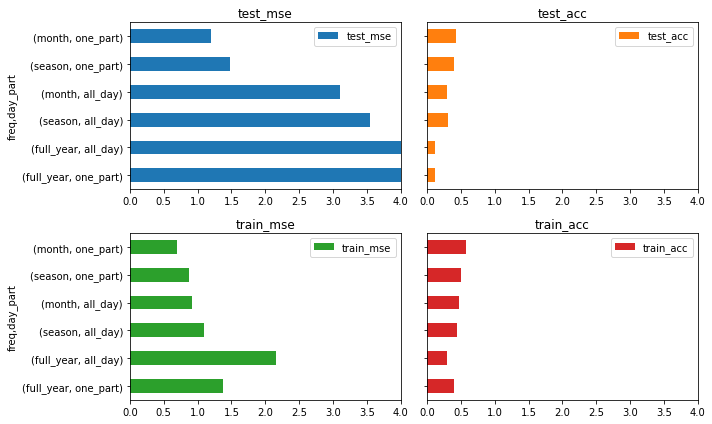

In [44]:
dfr = pd.DataFrame.from_dict(results, 'index')

dfr.groupby(['freq', 'day_part'])[['test_mse', 'test_acc', 'train_mse', 'train_acc']].mean()\
   .sort_values('test_mse', ascending=False)\
   .plot.barh(y=['test_mse', 'test_acc', 'train_mse', 'train_acc'], 
              subplots=True, layout=(2, 2), sharey=True, sharex=False, figsize=(10, 6), xlim=(0, 4))
display(dfr.groupby(['freq', 'day_part'])[['test_mse', 'test_acc', 'train_mse', 'train_acc']].mean())
plt.tight_layout()
plt.savefig(f'model_comp_rundom.png')
plt.show()
